In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #Add cities not already in cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm  sufficient count
len(cities)

593

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | andenes
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | yaan
Processing Record 12 of Set 1 | weinan
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | tairua
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | matara
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | shelburne
Processing Record 21 of Set 1 | omsukchan
Pro

Processing Record 35 of Set 4 | tilichiki
Processing Record 36 of Set 4 | faanui
Processing Record 37 of Set 4 | bima
Processing Record 38 of Set 4 | kuche
City not found. Skipping...
Processing Record 39 of Set 4 | ilebo
Processing Record 40 of Set 4 | zharkent
Processing Record 41 of Set 4 | howard springs
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | sola
Processing Record 44 of Set 4 | vardo
Processing Record 45 of Set 4 | corinto
Processing Record 46 of Set 4 | lompoc
Processing Record 47 of Set 4 | santa maria
Processing Record 48 of Set 4 | mayumba
Processing Record 49 of Set 4 | herbertpur
Processing Record 50 of Set 4 | tiksi
Processing Record 1 of Set 5 | palu
Processing Record 2 of Set 5 | honiara
Processing Record 3 of Set 5 | san juan
Processing Record 4 of Set 5 | carballo
Processing Record 5 of Set 5 | lorengau
Processing Record 6 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 5 | ghanzi
Processing Record 8 of

Processing Record 24 of Set 8 | harper
Processing Record 25 of Set 8 | funadhoo
Processing Record 26 of Set 8 | faya
Processing Record 27 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 28 of Set 8 | north bend
Processing Record 29 of Set 8 | waitati
Processing Record 30 of Set 8 | olafsvik
Processing Record 31 of Set 8 | abashiri
Processing Record 32 of Set 8 | bac lieu
Processing Record 33 of Set 8 | sobolevo
Processing Record 34 of Set 8 | rancho veloz
Processing Record 35 of Set 8 | morondava
Processing Record 36 of Set 8 | kamenka
Processing Record 37 of Set 8 | mikuni
Processing Record 38 of Set 8 | sogdiondon
City not found. Skipping...
Processing Record 39 of Set 8 | dondo
Processing Record 40 of Set 8 | fremont
Processing Record 41 of Set 8 | kemi
Processing Record 42 of Set 8 | kruisfontein
Processing Record 43 of Set 8 | vestmannaeyjar
Processing Record 44 of Set 8 | kloulklubed
Processing Record 45 of Set 8 | puerto narino
Processing Record 46 of Set 8

Processing Record 13 of Set 12 | chumikan
Processing Record 14 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 15 of Set 12 | dera bugti
Processing Record 16 of Set 12 | ilhabela
Processing Record 17 of Set 12 | ketchikan
Processing Record 18 of Set 12 | port-de-bouc
Processing Record 19 of Set 12 | sa kaeo
Processing Record 20 of Set 12 | huilong
Processing Record 21 of Set 12 | ji-parana
City not found. Skipping...
Processing Record 22 of Set 12 | charters towers
Processing Record 23 of Set 12 | avera
Processing Record 24 of Set 12 | moindou
Processing Record 25 of Set 12 | tara
Processing Record 26 of Set 12 | port blair
Processing Record 27 of Set 12 | burica
City not found. Skipping...
Processing Record 28 of Set 12 | acari
Processing Record 29 of Set 12 | sanduleni
Processing Record 30 of Set 12 | dongkan
Processing Record 31 of Set 12 | nuuk
Processing Record 32 of Set 12 | pringsewu
Processing Record 33 of Set 12 | yertsevo
Processing Record 34 of Set 12 | t

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2022-02-15 21:51:12,-46.2817,169.8464,60.93,67,93,7.00
1,Barrow,US,2022-02-15 21:51:12,71.2906,-156.7887,-30.98,100,0,10.36
2,Andenes,NO,2022-02-15 21:51:13,69.3143,16.1194,28.38,59,0,18.41
3,Kodiak,US,2022-02-15 21:46:19,57.7900,-152.4072,40.51,87,20,0.00
4,Albany,US,2022-02-15 21:50:12,42.6001,-73.9662,27.45,55,93,6.58
5,Butaritari,KI,2022-02-15 21:51:13,3.0707,172.7902,81.88,74,44,15.97
6,Busselton,AU,2022-02-15 21:51:14,-33.6500,115.3333,66.09,78,0,12.39
7,Ponta Do Sol,PT,2022-02-15 21:51:14,32.6667,-17.1000,62.06,62,38,7.54
8,Yaan,NG,2022-02-15 21:51:15,7.3833,8.5667,84.79,12,53,1.95
9,Weinan,CN,2022-02-15 21:51:15,34.5036,109.5089,33.49,78,93,5.17


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

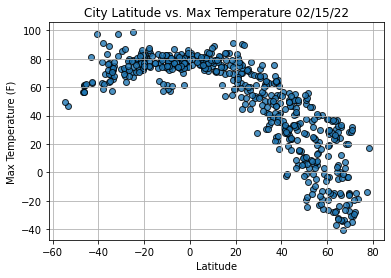

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

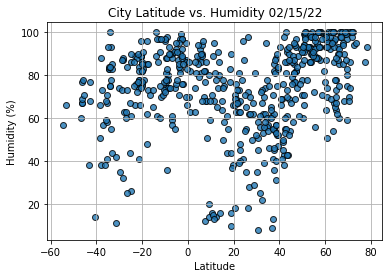

In [11]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

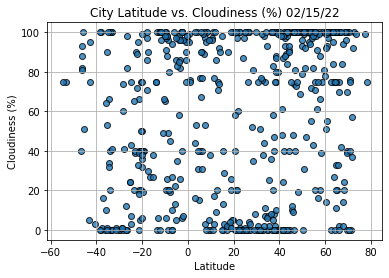

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

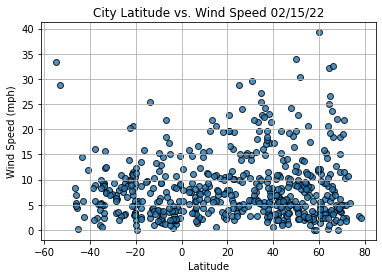

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


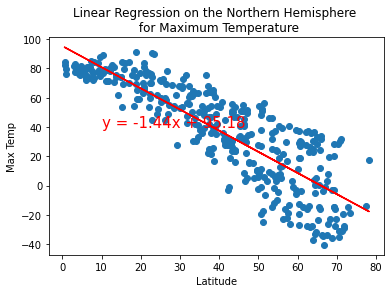

In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

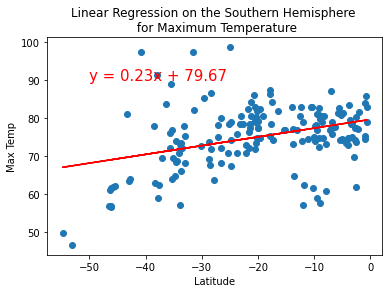

In [17]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n for Maximum Temperature''', 'Max Temp',(-50,90))

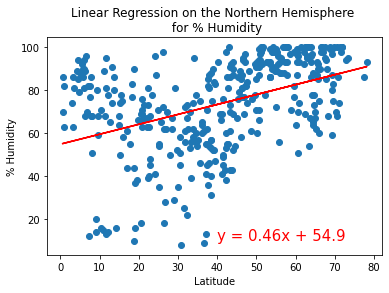

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

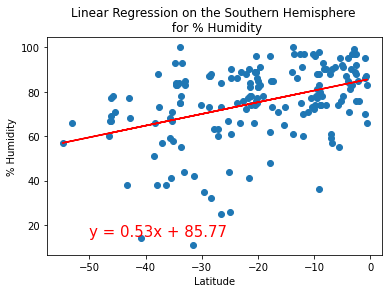

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

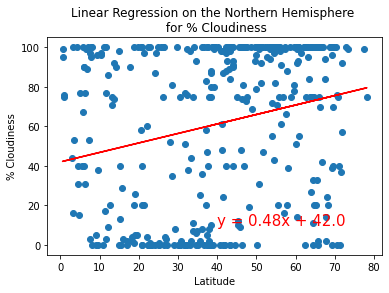

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

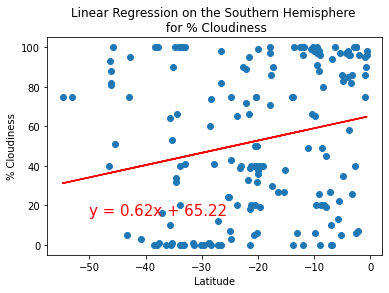

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

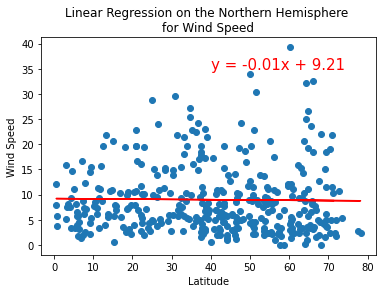

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

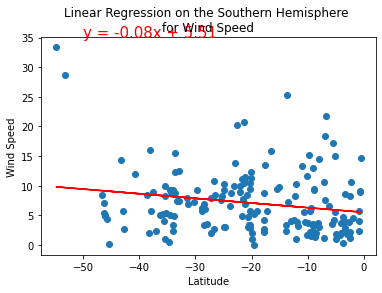

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))